In [ ]:
# Library untuk Pengolahan data
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

# Library untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Library untuk pemodelan
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import RepeatedKFold # for cv in TPOT
# from tpot import TPOTClassifier # TPOT Classifier
import tensorflow as tf

# Library untuk evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Pengumpulan Data**

In [ ]:
# Importing Dataset
data = pd.read_csv('/content/drive/MyDrive/Bangkit Academy/Machine Learning Path/survey.csv')
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
# Karakteristik Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
# Cek Data Kosong
if data.isnull().sum().sum() == 0 :
    print ('There is no missing data in our dataset')
else:
    print('There is {} missing data in our dataset '.format(data.isnull().sum().sum()))

There is 1892 missing data in our dataset 


In [ ]:
frame = pd.concat([data.isnull().sum(), data.nunique(), data.dtypes], axis = 1, sort= False)
frame

,0,1,2
Timestamp,0,1246,object
Age,0,53,int64
Gender,0,49,object
Country,0,48,object
state,515,45,object
self_employed,18,2,object
family_history,0,2,object
treatment,0,2,object
work_interfere,264,4,object
no_employees,0,6,object


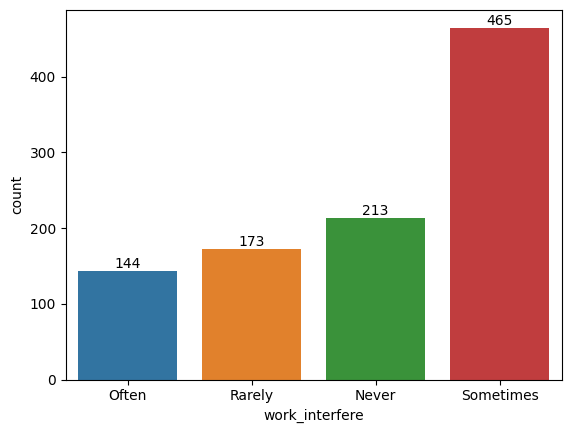

In [ ]:
# Visualisasi Work Interfere
ax = sns.countplot(data = data , x = 'work_interfere');
ax.bar_label(ax.containers[0]);

# **2. Preprocessing Data**

In [ ]:
# Drop Column yang Ga Penting
data = data.drop(columns=['state', 'comments'])

# Handling Missing Value
data['work_interfere'] = SimpleImputer(strategy = 'most_frequent').fit_transform(data['work_interfere'].values.reshape(-1,1))
data['self_employed'] = SimpleImputer(strategy = 'most_frequent').fit_transform(data['self_employed'].values.reshape(-1,1))
data.head()

# Slice Tanggal
data['Year'] = data['Timestamp'].apply(lambda x: np.int(x[0:4]))
data['Month'] = data['Timestamp'].apply(lambda x: np.int(x[5:7]))
data['Day'] = data['Timestamp'].apply(lambda x: np.int(x[8:10]))

data['Hour'] = data['Timestamp'].apply(lambda x: np.int(x[11:13]))
data['Minute'] = data['Timestamp'].apply(lambda x: np.int(x[14:16]))
data['Second'] = data['Timestamp'].apply(lambda x: np.int(x[17:19]))

data = data.drop('Timestamp', axis=1)
data

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,Month,Day,Hour,Minute,Second
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,No,Maybe,Yes,No,2014,8,27,11,29,31
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,...,No,No,Don't know,No,2014,8,27,11,29,37
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Yes,Yes,No,No,2014,8,27,11,29,44
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,Maybe,Maybe,No,Yes,2014,8,27,11,29,46
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Yes,Yes,Don't know,No,2014,8,27,11,30,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,Sometimes,26-100,No,Yes,...,No,No,Don't know,No,2015,9,12,11,17,21
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,No,No,Yes,No,2015,9,26,1,7,35
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,No,No,No,No,2015,11,7,12,36,58
1257,46,f,United States,No,No,No,Sometimes,100-500,Yes,Yes,...,No,No,No,No,2015,11,30,21,25,6


In [ ]:
# Grouping Gender Process
print(data['Gender'].unique())
print('')
print('-'*75)
print('')
print('number of unique Gender in our dataset is :', data['Gender'].nunique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']

---------------------------------------------------------------------------

number of unique Gender in our dataset is : 49


In [ ]:
data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

data['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

print(data['Gender'].unique())

['Female' 'Male' 'Other']


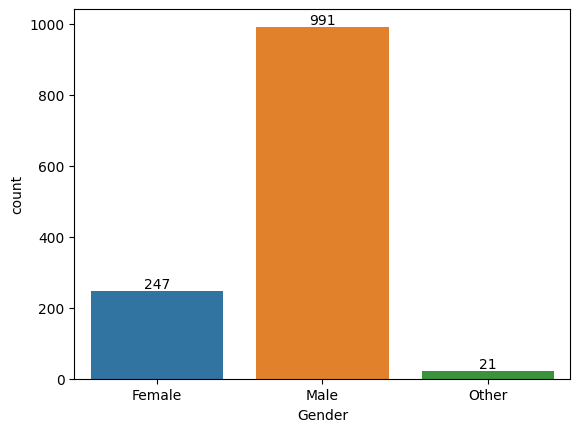

In [ ]:
# Perbandingan Data Gender
ax = sns.countplot(data=data, x='Gender');
ax.bar_label(ax.containers[0]);

In [ ]:
# Cek Apakah Masih Ada Missing Value
if data.isnull().sum().sum() == 0:
    print('There is no missing data')
else:
    print('There is {} missing data'.format(data.isnull().sum().sum()))

There is no missing data


In [ ]:
# Cek Apakah Ada Data Duplikat
if data.duplicated().sum() == 0:
    print('There is no duplicated data:')
else:
    print('There is {} duplicated data:'.format(data.duplicated().sum()))
    #If there is duplicated data drop it.
    data.drop_duplicates(inplace=True)

print('-'*50)
print(data.duplicated().sum())

There is no duplicated data:
--------------------------------------------------
0


In [ ]:
# Visualisasi Penyebaran Umur
data.drop(data[data['Age']<0].index, inplace = True)
data.drop(data[data['Age']>99].index, inplace = True)

print(data['Age'].unique())

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72]


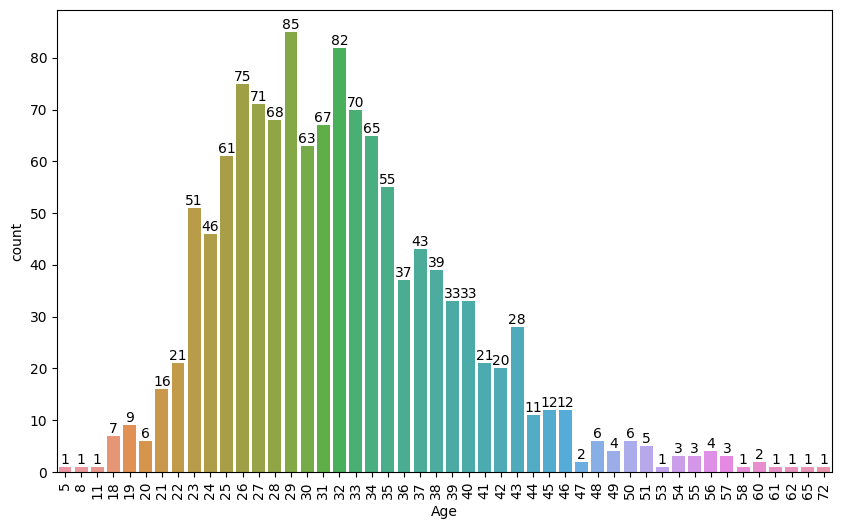

In [ ]:
plt.figure(figsize = (10,6))
age_range_plot = sns.countplot(data = data, x = 'Age');
age_range_plot.bar_label(age_range_plot.containers[0]);
plt.xticks(rotation=90);

<Figure size 1000x600 with 0 Axes>

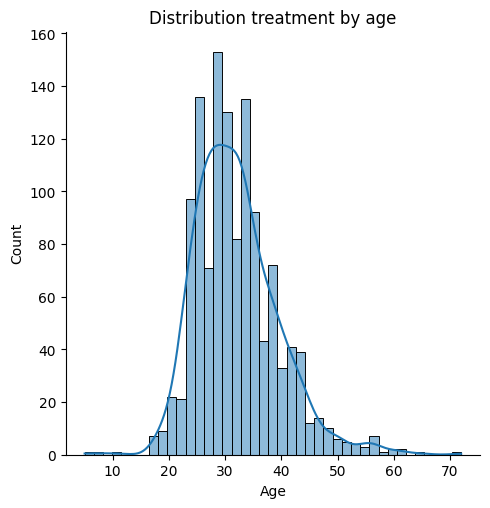

In [ ]:
plt.figure(figsize=(10, 6));
sns.displot(data['Age'], kde = 'treatment');
plt.title('Distribution treatment by age');

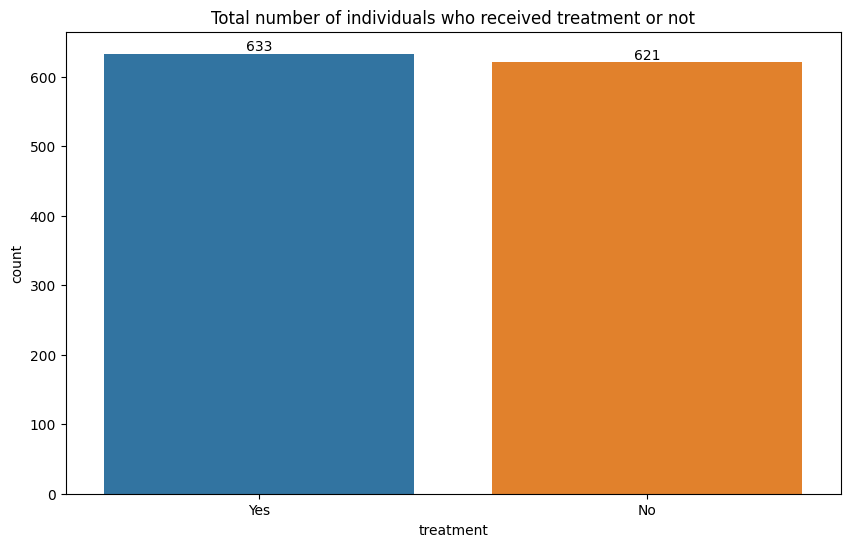

In [ ]:
# Perbandingan Label
plt.figure(figsize = (10,6));
treat = sns.countplot(data = data,  x = 'treatment');
treat.bar_label(treat.containers[0]);
plt.title('Total number of individuals who received treatment or not');

In [ ]:
# Encoding Data (Object) Menjadi Angka (Int)
le = LabelEncoder()
#Make the dataset include all the columns we need to change their dtypes
columns_to_encode = ['Gender', 'Country', 'self_employed','family_history', 'treatment', 'work_interfere','no_employees',
                             'remote_work', 'tech_company','benefits','care_options', 'wellness_program',
                             'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
                             'coworkers', 'supervisor', 'mental_health_interview','phys_health_interview',
                             'mental_vs_physical', 'obs_consequence']
#Write a Loop for fitting LabelEncoder on columns_to_encode
for columns in columns_to_encode:
    data[columns] = le.fit_transform(data[columns])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1258
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1254 non-null   int64
 1   Gender                     1254 non-null   int64
 2   Country                    1254 non-null   int64
 3   self_employed              1254 non-null   int64
 4   family_history             1254 non-null   int64
 5   treatment                  1254 non-null   int64
 6   work_interfere             1254 non-null   int64
 7   no_employees               1254 non-null   int64
 8   remote_work                1254 non-null   int64
 9   tech_company               1254 non-null   int64
 10  benefits                   1254 non-null   int64
 11  care_options               1254 non-null   int64
 12  wellness_program           1254 non-null   int64
 13  seek_help                  1254 non-null   int64
 14  anonymity               

In [ ]:
# Scalling Data
data['Age'] = MaxAbsScaler().fit_transform(data[['Age']])
data['Country'] = StandardScaler().fit_transform(data[['Country']])
data['work_interfere'] = StandardScaler().fit_transform(data[['work_interfere']])
data['no_employees'] = StandardScaler().fit_transform(data[['no_employees']])
data['leave'] = StandardScaler().fit_transform(data[['leave']])
data.describe()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,Month,Day,Hour,Minute,Second
count,1254.000000,1254.000000,1.254000e+03,1254.000000,1254.000000,1254.000000,1.254000e+03,1.254000e+03,1254.000000,1254.000000,...,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,0.444710,0.818182,-2.266484e-17,0.114833,0.390750,0.504785,-6.374486e-17,-6.516142e-17,0.297448,0.819777,...,0.868421,0.716906,0.814992,0.145136,2014.055821,7.795853,26.259968,12.839713,30.396332,30.163477
std,0.102431,0.423328,1.000399e+00,0.318947,0.488113,0.500177,1.000399e+00,1.000399e+00,0.457318,0.384527,...,0.425906,0.723840,0.834740,0.352378,0.233117,1.261417,5.211814,4.599245,17.202192,17.073371
min,0.069444,0.000000,-2.832292e+00,0.000000,0.000000,0.000000,-1.827534e+00,-1.602822e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.375000,1.000000,3.177693e-01,0.000000,0.000000,0.000000,-9.685659e-01,-1.027403e+00,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,2014.000000,8.000000,27.000000,11.000000,16.000000,16.000000
50%,0.430556,1.000000,5.427737e-01,0.000000,0.000000,1.000000,7.493713e-01,1.234352e-01,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,2014.000000,8.000000,27.000000,13.000000,31.000000,31.000000
75%,0.500000,1.000000,5.427737e-01,0.000000,1.000000,1.000000,7.493713e-01,6.988541e-01,1.000000,1.000000,...,1.000000,1.000000,2.000000,0.000000,2014.000000,8.000000,28.000000,16.000000,45.000000,45.000000
max,1.000000,2.000000,6.177752e-01,1.000000,1.000000,1.000000,7.493713e-01,1.274273e+00,1.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,2016.000000,12.000000,31.000000,23.000000,59.000000,59.000000


In [ ]:
# Pemilihan Variabel Dependen dan Independen
X = data.drop(columns = ['treatment'])
y = data['treatment']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **3. Modelling**

In [ ]:
# Pemodelan Deep Learning
# Input Layers
inputs = tf.keras.Input(shape=(X.shape[1],))
# Hidden Layers
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# Output Layers
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Model Create
model = tf.keras.Model(inputs, outputs)

# Model Compilation
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

# Training Model
batch_size = 64
epochs = 50
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50
12/12 [==============================] - 2s 84ms/step - loss: 0.6395 - accuracy: 0.6423 - auc: 0.7022 - val_loss: 0.5880 - val_accuracy: 0.6968 - val_auc: 0.7673 - lr: 0.0010
Epoch 2/50
12/12 [==============================] - 1s 42ms/step - loss: 0.5080 - accuracy: 0.7473 - auc: 0.8293 - val_loss: 0.6448 - val_accuracy: 0.6702 - val_auc: 0.7631 - lr: 0.0010
Epoch 3/50
12/12 [==============================] - 1s 47ms/step - loss: 0.4406 - accuracy: 0.8112 - auc: 0.8804 - val_loss: 0.6276 - val_accuracy: 0.6862 - val_auc: 0.7673 - lr: 0.0010
Epoch 4/50
12/12 [==============================] - 1s 46ms/step - loss: 0.3878 - accuracy: 0.8298 - auc: 0.9129 - val_loss: 0.6288 - val_accuracy: 0.7021 - val_auc: 0.7540 - lr: 0.0010
Epoch 5/50
12/12 [==============================] - 1s 46ms/step - loss: 0.3205 - accuracy: 0.8737 - auc: 0.9482 - val_loss: 0.6806 - val_accuracy: 0.6862 - val_auc: 0.7481 - lr: 0.0010
Epoch 6/50
12/12 [==============================] - 1s 43ms/step - los

# **4. Evaluasi Model**

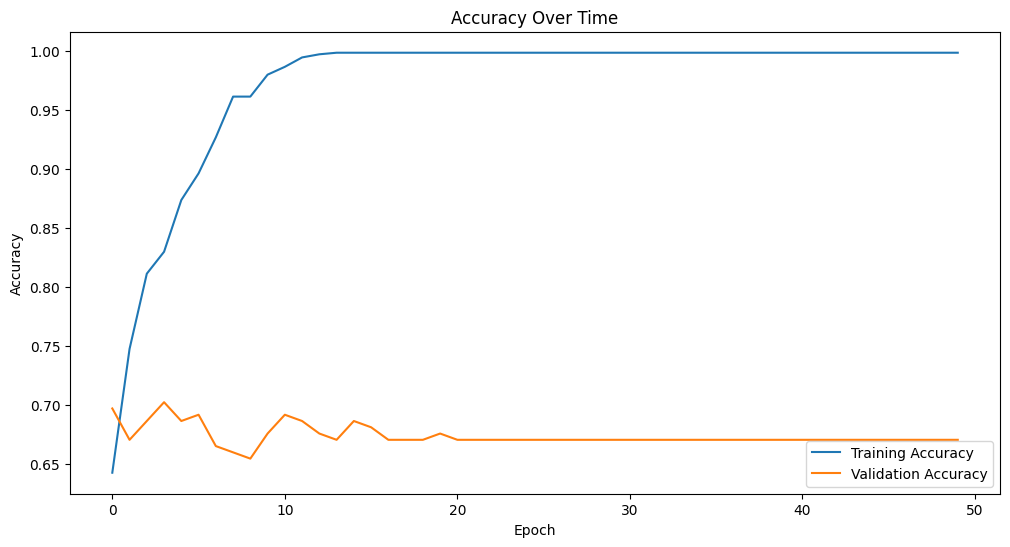

In [ ]:
# Plot History
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Over Time")
plt.show()

In [ ]:
# Akurasi Validation
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 8ms/step - loss: 1.1641 - accuracy: 0.7070 - auc: 0.7211


[1.1640987396240234, 0.7070063948631287, 0.7211229801177979]

In [ ]:
# Akurasi Training
model.evaluate(X_train, y_train)

30/30 [==============================] - 0s 12ms/step - loss: 0.2675 - accuracy: 0.9330 - auc: 0.9570


[0.2675402760505676, 0.9329787492752075, 0.9570143818855286]

In [ ]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
tflite_model_filename = 'model.tflite'
with open(tflite_model_filename, 'wb') as f:
    f.write(tflite_model)